In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv

# 1. 환경 변수 로드
load_dotenv()
DATA_PATH = os.getenv("DATA_PATH")

print(f"📂 Data Path: {DATA_PATH}")

# 2. 데이터 무결성 검사 (필수 파일 확인)
required_files = [
    'train_ratings.csv', 
    'titles.tsv', 
    'genres.tsv', 
    'years.tsv', 
    'writers.tsv', 
    'directors.tsv'
]

missing_files = []
for file in required_files:
    file_path = os.path.join(DATA_PATH, file)
    if not os.path.exists(file_path):
        print(f"❌ Missing: {file}")
        missing_files.append(file)
    else:
        print(f"✅ Found: {file}")

if not missing_files:
    print("\n✨ 모든 필수 데이터 파일이 존재합니다! EDA 단계로 넘어가도 좋습니다.")
else:
    print(f"\n⚠️ 다음 파일들이 누락되었습니다: {missing_files}. 경로를 다시 확인해주세요.")

📂 Data Path: C:\Users\rlaqu\Documents\GitHub\AI_Study_Logs\train
✅ Found: train_ratings.csv
✅ Found: titles.tsv
✅ Found: genres.tsv
✅ Found: years.tsv
✅ Found: writers.tsv
✅ Found: directors.tsv

✨ 모든 필수 데이터 파일이 존재합니다! EDA 단계로 넘어가도 좋습니다.


🎬 감독 데이터 개수: 5905
🎥 영화(Item) 개수: 5503
   item   director
0  1237  nm0000005
1  5147  nm0000005
2  7327  nm0000005
3  2068  nm0000005
4  7396  nm0000005

🏆 총 감독 수: 1340
Top 5 다작 감독:
director
nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
Name: count, dtype: int64

🌟 인기 감독 Top 10 (시청 횟수 합계):
director
nm0000229    130434
nm0000233     81880
nm0634240     65526
nm0000709     63374
nm0001392     60938
nm0000217     55303
nm0001054     54395
nm0000116     53624
nm0000399     53385
nm0000631     53160
Name: view_count, dtype: int64


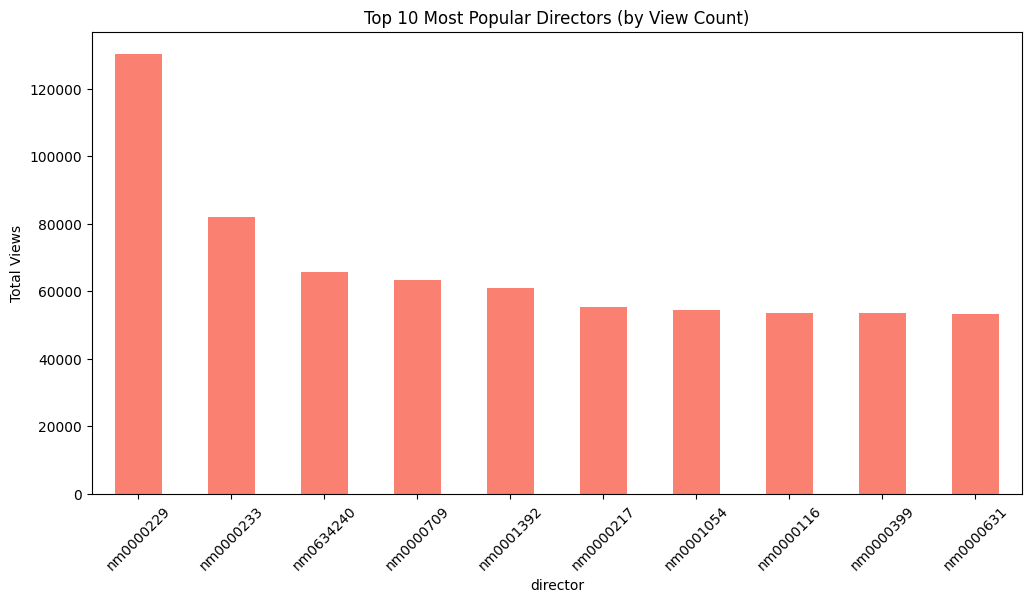

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# 1. 데이터 로드
load_dotenv()
DATA_PATH = os.getenv("DATA_PATH")

df_directors = pd.read_csv(os.path.join(DATA_PATH, 'directors.tsv'), sep='\t')
df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_ratings.csv'))

print(f"🎬 감독 데이터 개수: {len(df_directors)}")
print(f"🎥 영화(Item) 개수: {df_directors['item'].nunique()}")
print(df_directors.head())

# 2. 감독별 연출 작품 수 (다작왕 찾기)
director_counts = df_directors['director'].value_counts()
print(f"\n🏆 총 감독 수: {len(director_counts)}")
print(f"Top 5 다작 감독:\n{director_counts.head(5)}")

# 3. 평점 데이터와 병합하여 '인기 감독' 찾기
# (아이템이 많이 소비되었을수록 인기 있는 감독으로 가정)
item_counts = df_train['item'].value_counts().reset_index()
item_counts.columns = ['item', 'view_count']

# 감독 정보에 시청 횟수 붙이기
director_popularity = pd.merge(df_directors, item_counts, on='item', how='left')

# 시청 횟수 총합 기준 Top 10 감독
top_directors = director_popularity.groupby('director')['view_count'].sum().sort_values(ascending=False).head(10)

print("\n🌟 인기 감독 Top 10 (시청 횟수 합계):")
print(top_directors)

# 4. 시각화 (Top 20 감독)
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Popular Directors (by View Count)')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

In [4]:
print(df_directors.head())
df_train.head()

   item   director
0  1237  nm0000005
1  5147  nm0000005
2  7327  nm0000005
3  2068  nm0000005
4  7396  nm0000005


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [5]:
df_merged = df_train.merge(df_directors, on='item', how='left')
print(df_merged.head())

   user  item        time   director
0    11  4643  1230782529  nm0000318
1    11   170  1230782534  nm0812200
2    11   531  1230782539  nm0002140
3    11   616  1230782542  nm0718627
4    11  2140  1230782563  nm0000568


In [11]:
null_count=df_merged['director'].isnull().sum()
print(f"감독 정보 결측치 수: {null_count}")
all_interaction = df_merged.value_counts().sum()
print(f"전체 감독 결측률 : {null_count/all_interaction}")

# 등장하는 고유한 감독 수
unique_director = df_merged['director'].nunique()
print(f"고유 감독 수: {unique_director}")

# 가장 많이 등장한 감독 Top 10 
top_directors = df_merged['director'].value_counts().head(10)
print(top_directors.head(10))

감독 정보 결측치 수: 301445
전체 감독 결측률 : 0.05574564106054027
고유 감독 수: 1340
director
nm0000229    130434
nm0000233     81880
nm0634240     65526
nm0000709     63374
nm0001392     60938
nm0000217     55303
nm0001054     54395
nm0000116     53624
nm0000399     53385
nm0000631     53160
Name: count, dtype: int64


In [13]:
# 유저와 디렉터의 고유한 감독의 수를 구하고, 그 값의 분포를 확인
user_director_counts = df_merged.groupby('user')['director'].nunique()
# 4분위 통계
print(user_director_counts.describe())
# 
single_director_fans = (user_director_counts == 1).sum()
print(f"한 감독만 본 사용자 수: {single_director_fans}")

count    31360.000000
mean       115.724872
std         79.467544
min          7.000000
25%         60.000000
50%         90.000000
75%        145.000000
max        928.000000
Name: director, dtype: float64
한 감독만 본 사용자 수: 0


In [17]:
# 사용자별로 각 감독을 몇번 봤는지 세고
# 가장 많이 본 감독의 횟수를 뽑고
# 각 사용자의 전체 시청횟수를 통해 얼마나 충성도가 있는지 확인한다..
pair_counts = df_merged.groupby(['user','director']).size()

# 가장 많이 본 감독의 횟수
user_max_counts = pair_counts.groupby('user').max()

# 각 사용자의 전체 시청횟수?
user_total_counts = df_merged.groupby('user').size()
# 충성도 계산
loyalty_score = user_max_counts/user_total_counts

print(loyalty_score.sort_values(ascending=False).head())
print(loyalty_score.describe())


user
101347    0.369565
65058     0.314286
38765     0.276190
64868     0.261905
62062     0.255319
dtype: float64
count    31360.000000
mean         0.042598
std          0.020113
min          0.006614
25%          0.028571
50%          0.038961
75%          0.052632
max          0.369565
dtype: float64


In [18]:
# 1. 감독별 전체 등장 횟수(인기도)를 구합니다.
director_counts = df_merged['director'].value_counts()

# 2. 상위 100명의 등장 횟수 합을 구합니다.
top100_counts = director_counts.head(100).sum()

# 3. 전체 등장 횟수 합을 구합니다.
total_counts = director_counts.sum()

# 4. 비율 계산 (Coverate)
top100_ratio = top100_counts / total_counts

print(f"상위 100명 감독의 점유율: {top100_ratio:.2%}")

상위 100명 감독의 점유율: 49.95%
